In [1]:
import pandas as pd

# Sample dataset of news articles with labels (Positive, Negative, Neutral)
data = {
    "news_article": [
        "Scientists find a breakthrough cure for a rare disease.",
        "The economy is in crisis as unemployment rates hit an all-time high.",
        "The stock market saw a 2% increase in the last trading session.",
        "A hurricane caused severe damage to several coastal cities.",
        "New technological advancements in AI are revolutionizing the industry.",
        "The country has entered into a trade war with its largest partner.",
        "The weather today is expected to be clear and sunny.",
        "A new medical study shows a significant decrease in cancer rates.",
        "A natural disaster has led to thousands of casualties.",
        "Government officials announced new initiatives to improve public health."
    ],
    "sentiment": [
        "Positive", "Negative", "Neutral", "Negative", "Positive", "Negative", "Neutral", "Positive", "Negative", "Neutral"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the data to a CSV file for further use
df.to_csv("news_sentiment_dataset.csv", index=False)

# Display the sample dataset
df.head()


,news_article,sentiment
0,Scientists find a breakthrough cure for a rare...,Positive
1,The economy is in crisis as unemployment rates...,Negative
2,The stock market saw a 2% increase in the last...,Neutral
3,A hurricane caused severe damage to several co...,Negative
4,New technological advancements in AI are revol...,Positive


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Enter a news article (or type 'exit' to quit): I absolutely love this place; the atmosphere is amazing
Predicted Sentiment: positive, Confidence: 0.99

Enter a news article (or type 'exit' to quit): The product quality was poor and didn’t meet my expectations
Predicted Sentiment: negative, Confidence: 0.92

Enter a news article (or type 'exit' to quit): The event took place last Friday and lasted three hours
Predicted Sentiment: neutral, Confidence: 0.89

Enter a news article (or type 'exit' to quit): The movie was okay, but it wasn’t my favorite genre
Predicted Sentiment: negative, Confidence: 0.72

Enter a news article (or type 'exit' to quit): This was one of the best experiences I've had.
Predicted Sentiment: positive, Confidence: 0.99

Enter a news article (or type 'exit' to quit): exit


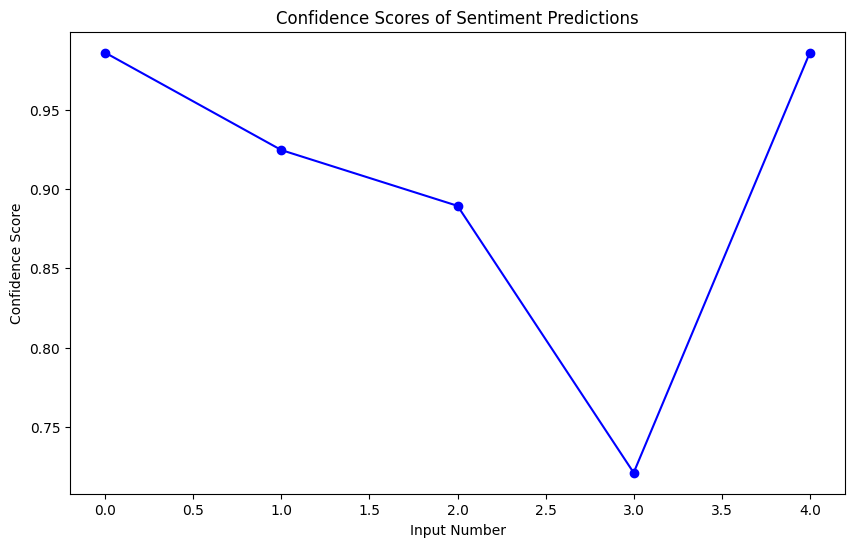

In [6]:
from transformers import pipeline

# Initialize classifier
classifier = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

# Lists to store results for plotting
sentiments = []
scores = []

# Loop to get user input, classify, and store results
while True:
    user_text = input("Enter a news article (or type 'exit' to quit): ")
    if user_text.lower() == 'exit':
        break
    result = classifier(user_text)
    sentiment = result[0]['label']
    score = result[0]['score']

    sentiments.append(sentiment)
    scores.append(score)

    print(f"Predicted Sentiment: {sentiment}, Confidence: {score:.2f}\n")

# Plotting the confidence scores for each user input
plt.figure(figsize=(10, 6))
plt.plot(scores, marker='o', color='b')
plt.title('Confidence Scores of Sentiment Predictions')
plt.xlabel('Input Number')
plt.ylabel('Confidence Score')
plt.show()


<ipython-input-7-1c6860a327dd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


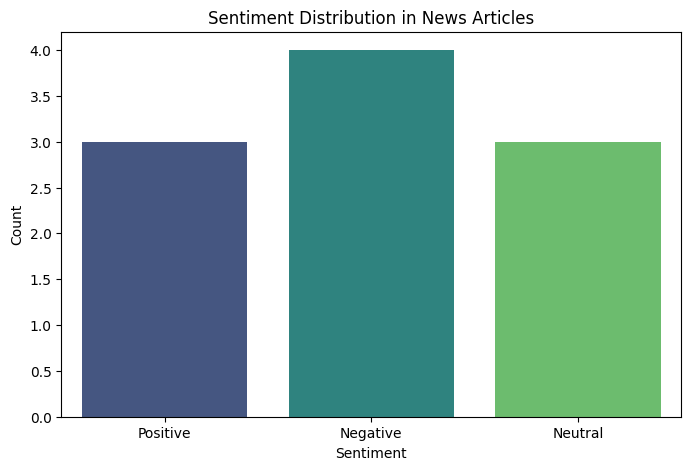

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("news_sentiment_dataset.csv")  # replace with your csv file path

# Plot sentiment distribution in the dataset
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution in News Articles')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


